# EX 10.1

In [1]:
import numpy as np
import scipy.optimize as opt

m, n = 100, 50
A = np.random.rand(m, n)  
b = np.random.random(m)
 
res = opt.lsq_linear(A, b)
x = res.x
 
residual = b - np.dot(A, x)
norm = np.linalg.norm(residual)
 
print(norm)

2.2029358651353443


# EX 10.2

In [2]:
def f(x):  
    res = np.power(np.sin(x-2), 2) * np.exp(-1*(x**2))
    return -1 * res
    
res = opt.minimize_scalar(f)
x = res.x
print(-1*f(x))

0.9116854118471548


# EX 10.3

C:\Users\gizem\AppData\Local\Temp/ipykernel_17340/3159900022.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


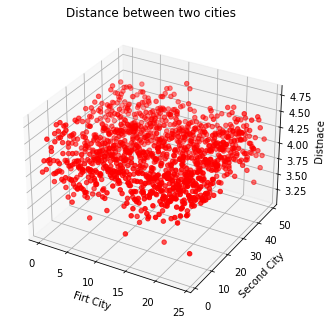

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial.distance as dis
 
n, m = 50, 100
X = np.random.rand(n, m)
de = dis.pdist(X)
 
x = []
y = []
for a in range(0, n//2):
    x = x + [a for _ in range(1, n)]
    y = y + [b for b in range(1, n)]
 
x = np.array(x) 
y = np.array(y) 
 
fig = plt.figure()
ax = Axes3D(fig)
 
plt.title("Distance between two cities")  
ax.set_xlabel ('Firt City') 
ax.set_ylabel('Second City')
ax.set_zlabel('Distnace')
 
ax.scatter(x, y, de, c='r')
plt.show()

#  EX 11.1

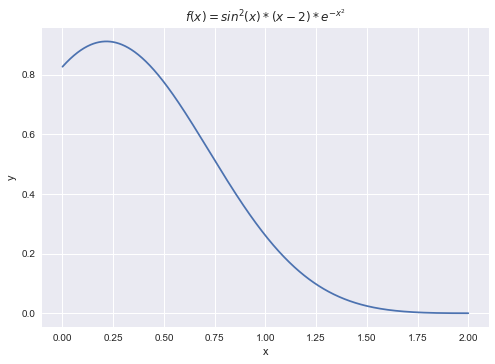

In [9]:
import matplotlib.pyplot as plt
import math
import numpy as np


def fun(x):
    return math.sin(x-2) ** 2 * math.exp(-x ** 2)

x = np.linspace(0, 2, num=1000)
plt.style.use('seaborn')
fun = np.vectorize(fun)
plt.plot(x, fun(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$f(x)=sin^2(x)*(x-2)*e^{-x^2}$')
plt.show()

# EX 11.2

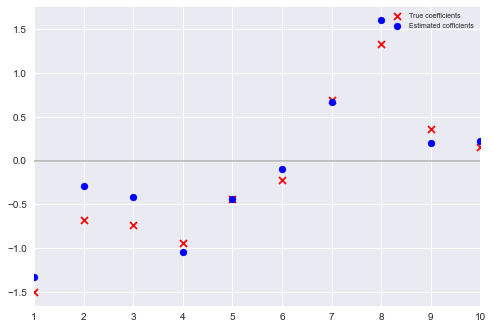

In [10]:
X = np.random.normal(0, 1, [20, 10])
b = np.random.normal(0, 1, 10)
z = np.random.normal(0, 1, 20)
y = np.matmul(X, b.reshape(-1, 1)) + z.reshape(-1, 1)

inverse = np.linalg.inv(np.matmul(np.transpose(X), X))
w = np.matmul(inverse, np.matmul(np.transpose(X), y))

x = np.linspace(1, 10, 10, endpoint=True)
plt.scatter(x, b, marker='x', color='r',label='True coefficients')
plt.scatter(x, w, marker='o', color='blue',label='Estimated cofficients')
plt.legend(loc=1, ncol=1, prop={'size': 7})
plt.plot(x, [0.0 for i in range(10)], color='gray', alpha=0.5)
plt.xticks(x)
plt.margins(x=0)
plt.show()

# EX 11.3

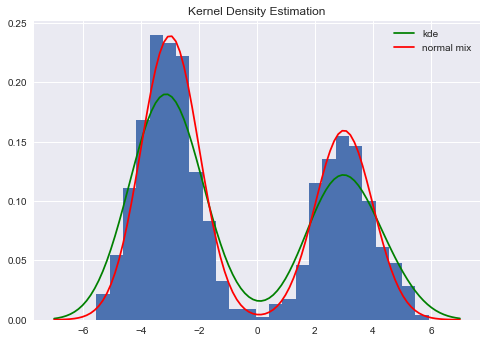

In [12]:
from scipy import stats

n_basesample = 1000

alpha = 0.6 
mlow, mhigh = (-3.0, 3.0)  
xn = np.concatenate([mlow + np.random.randn(int(alpha * n_basesample)),
                     mhigh + np.random.randn(int((1 - alpha) * n_basesample))])


gkde = stats.gaussian_kde(xn)

ind = np.linspace(-7, 7, 101)
kdepdf = gkde.evaluate(ind)

plt.style.use('seaborn')

plt.hist(xn, bins=25, density=1)

plt.plot(ind, kdepdf, label='kde', color="g")

plt.plot(ind, alpha * stats.norm.pdf(ind, loc=mlow) +
         (1 - alpha) * stats.norm.pdf(ind, loc=mhigh),
         color="r", label='normal mix')

plt.title('Kernel Density Estimation')
plt.legend()
plt.xticks()
plt.show()